In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/train.csv')
test=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/test.csv')
submit=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/sample_submission.csv')

In [3]:
train['label']=train['label'].apply(lambda x:'2' if x=='missing' else x)
train['label']=train['label'].apply(lambda x:'0' if x=='NAN' else x)

In [4]:
y=train['label'].astype(int).values
X=train.drop(['id','label'],axis=1).values

In [5]:
X_test=test.drop('id',axis=1).values

In [6]:
# from sklearn.model_selection import train_test_split

# X_tr,X_val,y_tr,y_val=train_test_split(X,y,random_state=71,stratify=y,test_size=0.2)

In [7]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_ovr, y = sm.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [8]:
X_tr = X_train_ovr.astype('float32')/255
# X_val = X_val.astype('float32')/255

In [9]:
X_test=X_test.astype('float32')/255

In [10]:
X_tr = pd.DataFrame(X_tr)
X_ovr = X_tr.values
X_train_ovr = X_ovr.reshape(-1,28,28,1)

In [11]:
X_test = pd.DataFrame(X_test)
X_test = X_test.values
X_test = X_test.reshape(-1,28,28,1)

In [12]:
# X_val_df = pd.DataFrame(X_val)
# X_val_df = X_val_df.values
# X_val_df = X_val_df.reshape(-1,28,28,1)

In [13]:
y

array([2, 9, 6, ..., 9, 9, 9])

In [14]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y)
print(lb.classes_)
y_tr_lb = lb.transform(y)
# y_val_lb = lb.transform(y_val)
y_tr_lb

[0 1 2 3 4 5 6 7 8 9]


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [31]:
import tensorflow as tf
import keras 
from keras import layers
from keras import models
from keras.layers import *
model1 = models.Sequential()
model1.add(layers.Conv2D(16,(3,3),activation='relu',input_shape = (28,28,1),name='conv2d_layer1'))
model1.add(layers.Conv2D(32,(3,3),activation='relu'))
model1.add(layers.Conv2D(64,(3,3),activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001))
model1.add(layers.Conv2D(128,(3,3),activation='relu',name='conv2d_layer2'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001))
model1.add(layers.Flatten())
model1.add(Dense(64,activation = 'relu'))
model1.add(Dense(32,activation = 'relu'))
model1.add(Dense(10,activation='softmax'))

In [32]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_layer1 (Conv2D)       (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
conv2d_layer2 (Conv2D)       (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)        

In [41]:
Adam=tf.keras.optimizers.Adam(
    learning_rate=0.01,epsilon=1e-1, amsgrad=False,name='Adam')
model1.compile(
    optimizer=Adam,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

y_pred_tr=model1.fit(X_train_ovr,y_tr_lb,epochs=1,batch_size=32,validation_split=0.2)

1200/1200 [==============================] - 7s 5ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0431 - val_accuracy: 0.9837


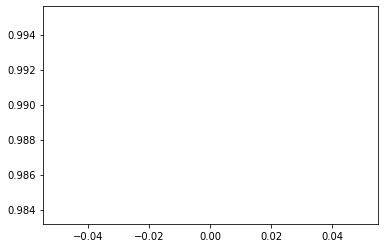

In [42]:
try:
    plt.plot(y_pred_tr.history['accuracy'])
    plt.plot(y_pred_tr.history['val_accuracy'])
except KeyError:
 plt.plot(y_pred_tr.history['accuracy'])
 plt.plot(y_pred_tr.history['val_accuracy'])
 plt.title('Accuracy vs. epochs')
 plt.ylabel('Loss')
 plt.xlabel('Epoch')
 plt.legend(['Training'], loc='lower right')
 plt.show() 

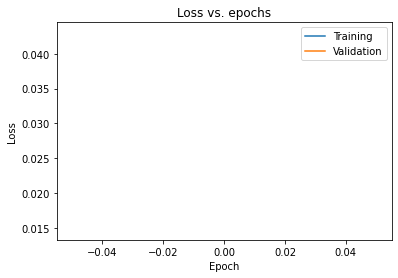

In [43]:
plt.plot(y_pred_tr.history['loss'])
plt.plot(y_pred_tr.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [44]:
y_pred = model1.predict(X_test, batch_size=32)
y_pred1 =lb.inverse_transform(y_pred)
y_pred1

array([0, 2, 4, ..., 5, 6, 1])

In [45]:
submit['label']=y_pred1
submit

,id,label
0,11,0
1,15,2
2,17,4
3,21,7
4,22,4
...,...,...
8455,59970,7
8456,59971,5
8457,59982,5
8458,59986,6


In [46]:
# submit['label']=submit['label'].apply(lambda x:'missing' if x=='2' else x)
# submit['label']=submit['label'].apply(lambda x:'NAN' if x=='10' else x)

In [47]:
submit.head(100)

,id,label
0,11,0
1,15,2
2,17,4
3,21,7
4,22,4
...,...,...
95,599,4
96,602,0
97,606,4
98,608,4


In [48]:
CNN_submit =submit.to_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/CNN1.csv',index=False)